In [ ]:
import requests  # go out and fetch
import pandas as pd
import numpy as np
import re
import seaborn as sns
import string
import os
import glob
import nltk
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize, WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download("stopwords")
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')

from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [2]:
file_folder = '/Users/anjalee/Desktop/DemoFolder/pythonSubDir/session_transcripts/*.txt'
therapist = ["therapist:", "th:"]
patient = ["client:", "cl:"]
col_names = ['fname','therapist','sentence'] 
df = pd.DataFrame(columns=col_names)

ts_pattern = re.compile('\[\d\d:\d\d\:\d\d\]')
df_append = pd.DataFrame(columns=col_names)
p_dt = '\d\:\d\d\:\d\d' #timestamp pattern

stop_words = set(stopwords.words("english"))

lemma = WordNetLemmatizer()

In [3]:
def cleanup_sentences(sentence):
    text = re.sub('[^a-zA-Z]'," ", sentence) # Removing non a-z characters
    # text = sentence
    print(sentence) # Print out non-cleaned text
    text = text.lower() # Lowering all text
    text = word_tokenize(text, language="english") # Splitting each word into an element of a list
    text = [lemma.lemmatize(word) for word in text if(word) not in stop_words] # Lemmatizing words and removing stopwords
    text = " ".join(text) # Putting words back into a single string. ['the', 'brown', 'cow'] --> 'the brown cow'
    print(text, '\n') # Print out cleaned text
    return text

# wordcloud function
 
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))
 
    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)
 
    plt.imshow(wordcloud)
    plt.show()




In [ ]:
# Get files
folder = '/Users/anjalee/Desktop/DemoFolder/pythonSubDir/session_transcripts/*.txt'

for fpath in glob.iglob(folder):

    with open(fpath,'r') as f:
        fname = fpath.split("transcripts/")
        for line in f:
            line = f.readline() # read line

    #CLEAN IN THIS ORDER
            
            line = line.lower() # lowercase
            line = re.sub(p_dt,'', line) # extract all timestamps
            #extract all stop_words

            df_append = pd.DataFrame(columns=col_names) # clear df_append from last time
            if ('therapist:' in line) or ('th:' in line):
                #remove the label from beginning of sentence
                line = line.removeprefix("therapist") 
                line = line.removeprefix("th")
                line = cleanup_sentences(line)

                # line = line.translate(str.maketrans('', '', string.punctuation)) # extract all punctuation
                # line = line.replace('\n','') #clean the \n off sentences
                df_append = pd.DataFrame([[fname,'1',line]], columns=col_names) 

            elif ('client:' in line) or ('cl:' in line):
                line = line.removeprefix('client'); 
                line = line.removeprefix('cl')
                line = cleanup_sentences(line)
                # line = line.translate(str.maketrans('', '', string.punctuation))
                # line = line.replace('\n','') #clean the \n off sentences
                df_append = pd.DataFrame([[fname,'0',line]], columns=col_names)     
            
            df = pd.concat([df, df_append]) #because append() is gone
            
            
            if not line:
                break
        

Get Frequency
Word Cloud
- Word Cloud between client and therapist
- classification between client and therapist


/Users/anjalee/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentence', ylabel='Density'>

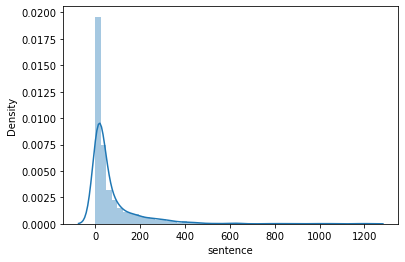

In [44]:
# Frequency
word_frequ = df["sentence"].str.split(expand=True).stack().value_counts()
## Length of the Text using KDEplot
length = df["sentence"].str.len()
sns.distplot(length)
# sns.histplot(lenght)
# plt.show()


In [ ]:

# WordClouds!
show_wordcloud(df['sentence']); 
# total, therapist only, client only
show_wordcloud(df['sentence'].loc[df["therapist"] == '1'], "therapist"); show_wordcloud(df['sentence'].loc[df["therapist"] == '0'], "client")

In [37]:
wc = WordCloud(collocations=False).generate(df['sentence'])

plt.imshow(wc)
plt.show()

TypeError: expected string or bytes-like object

In [ ]:



# Since the text is small collocations are turned off and text is lower-cased
wc = WordCloud(collocations=False).generate(df['sentence'])

color_to_words = {
    # words below will be colored with a green single color function
    '#00ff00': ['beautiful', 'explicit', 'simple', 'sparse',
                'readability', 'rules', 'practicality',
                'explicitly', 'one', 'now', 'easy', 'obvious', 'better'],
    # will be colored with a red single color function
    'red': ['ugly', 'implicit', 'complex', 'complicated', 'nested',
            'dense', 'special', 'errors', 'silently', 'ambiguity',
            'guess', 'hard']
}

# Words that are not in any of the color_to_words values
# will be colored with a grey single color function
default_color = 'grey'

# Create a color function with single tone
# grouped_color_func = SimpleGroupedColorFunc(color_to_words, default_color)

# Create a color function with multiple tones
grouped_color_func = GroupedColorFunc(color_to_words, default_color)

# Apply our color function
wc.recolor(color_func=grouped_color_func)

# Plot
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [20]:
from wordcloud import (WordCloud, get_single_color_func)
import matplotlib.pyplot as plt


class SimpleGroupedColorFunc(object):
    """Create a color function object which assigns EXACT colors
       to certain words based on the color to words mapping

       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.

       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.word_to_color = {word: color
                              for (color, words) in color_to_words.items()
                              for word in words}

        self.default_color = default_color

    def __call__(self, word, **kwargs):
        return self.word_to_color.get(word, self.default_color)


class GroupedColorFunc(object):
    """Create a color function object which assigns DIFFERENT SHADES of
       specified colors to certain words based on the color to words mapping.

       Uses wordcloud.get_single_color_func

       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.

       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.color_func_to_words = [
            (get_single_color_func(color), set(words))
            for (color, words) in color_to_words.items()]

        self.default_color_func = get_single_color_func(default_color)

    def get_color_func(self, word):
        """Returns a single_color_func associated with the word"""
        try:
            color_func = next(
                color_func for (color_func, words) in self.color_func_to_words
                if word in words)
        except StopIteration:
            color_func = self.default_color_func

        return color_func

    def __call__(self, word, **kwargs):
        return self.get_color_func(word)(word, **kwargs)



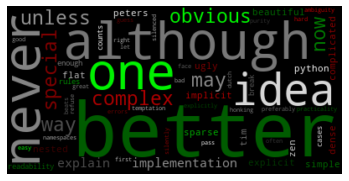

In [16]:
from wordcloud import (WordCloud, get_single_color_func)
import matplotlib.pyplot as plt


class SimpleGroupedColorFunc(object):
    """Create a color function object which assigns EXACT colors
       to certain words based on the color to words mapping

       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.

       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.word_to_color = {word: color
                              for (color, words) in color_to_words.items()
                              for word in words}

        self.default_color = default_color

    def __call__(self, word, **kwargs):
        return self.word_to_color.get(word, self.default_color)


class GroupedColorFunc(object):
    """Create a color function object which assigns DIFFERENT SHADES of
       specified colors to certain words based on the color to words mapping.

       Uses wordcloud.get_single_color_func

       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.

       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.color_func_to_words = [
            (get_single_color_func(color), set(words))
            for (color, words) in color_to_words.items()]

        self.default_color_func = get_single_color_func(default_color)

    def get_color_func(self, word):
        """Returns a single_color_func associated with the word"""
        try:
            color_func = next(
                color_func for (color_func, words) in self.color_func_to_words
                if word in words)
        except StopIteration:
            color_func = self.default_color_func

        return color_func

    def __call__(self, word, **kwargs):
        return self.get_color_func(word)(word, **kwargs)


# text = """The Zen of Python, by Tim Peters
# Beautiful is better than ugly.
# Explicit is better than implicit.
# Simple is better than complex.
# Complex is better than complicated.
# Flat is better than nested.
# Sparse is better than dense.
# Readability counts.
# Special cases aren't special enough to break the rules.
# Although practicality beats purity.
# Errors should never pass silently.
# Unless explicitly silenced.
# In the face of ambiguity, refuse the temptation to guess.
# There should be one-- and preferably only one --obvious way to do it.
# Although that way may not be obvious at first unless you're Dutch.
# Now is better than never.
# Although never is often better than *right* now.
# If the implementation is hard to explain, it's a bad idea.
# If the implementation is easy to explain, it may be a good idea.
# Namespaces are one honking great idea -- let's do more of those!"""

# Since the text is small collocations are turned off and text is lower-cased
wc = WordCloud(collocations=False).generate(text.lower())

color_to_words = {
    # words below will be colored with a green single color function
    '#00ff00': ['beautiful', 'explicit', 'simple', 'sparse',
                'readability', 'rules', 'practicality',
                'explicitly', 'one', 'now', 'easy', 'obvious', 'better'],
    # will be colored with a red single color function
    'red': ['ugly', 'implicit', 'complex', 'complicated', 'nested',
            'dense', 'special', 'errors', 'silently', 'ambiguity',
            'guess', 'hard']
}

# Words that are not in any of the color_to_words values
# will be colored with a grey single color function
default_color = 'grey'

# Create a color function with single tone
# grouped_color_func = SimpleGroupedColorFunc(color_to_words, default_color)

# Create a color function with multiple tones
grouped_color_func = GroupedColorFunc(color_to_words, default_color)

# Apply our color function
wc.recolor(color_func=grouped_color_func)

# Plot
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [13]:
wordcloud2 = WordCloud().generate(' '.join(df['sentence']))

NameError: name 'WordCloud' is not defined

True